In [72]:
import sys
sys.path.append('vysxd')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from matplotlib.cm import get_cmap
from scipy.signal import savgol_filter
from vysxd_define import *
from vysxd_analysis import *

%matplotlib inline

#### Triangle driver envelope

In [7]:
# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3/MS/DENSITY/electrons/charge/')
# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1_sin2driver/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.11_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.11_sin2driver/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.05_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.05_sin2driver/MS/DENSITY/electrons/charge/')

e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('EPW-alves/MS/FLD/e1/')
edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('EPW-alves/MS/DENSITY/electrons/charge/')

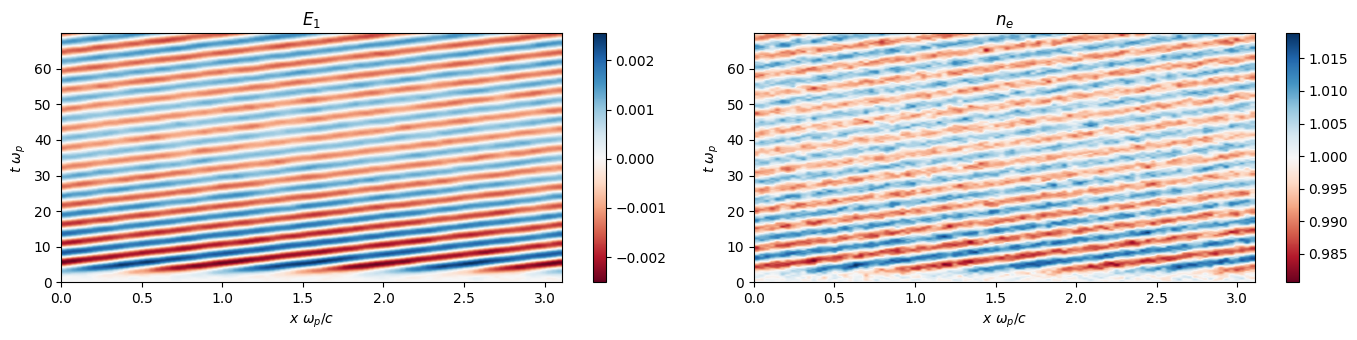

In [8]:
plt.figure(figsize=(14,3.5))
plt.subplot(1,2,1)
plt.title('$E_1$')
plt.imshow(e1_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto',cmap = 'RdBu')
# vphi = 0.03933/4
# plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('$n_e$')
plt.imshow(-1*edens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto',cmap = 'RdBu')
# plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.tight_layout()

Show damping for a couple different simulations

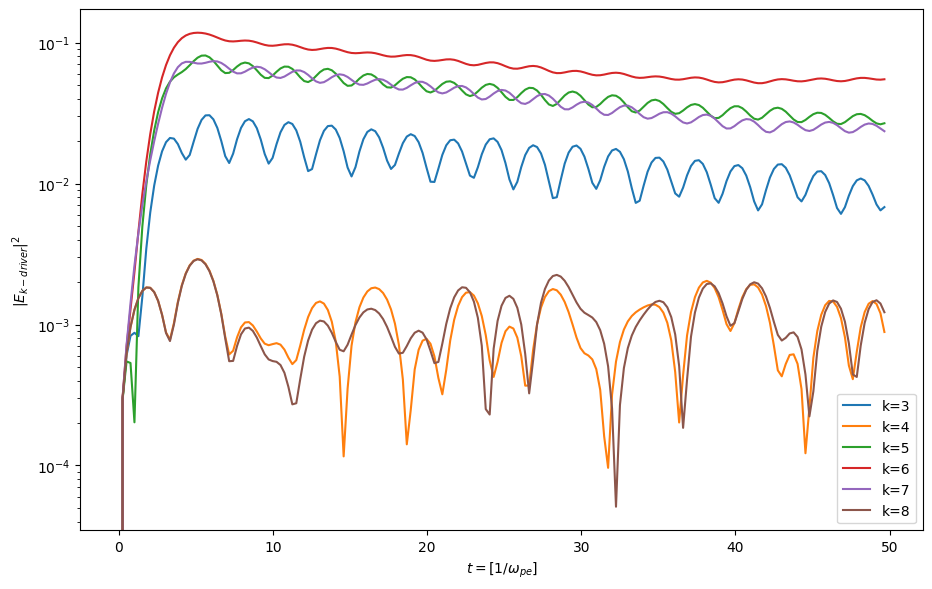

In [76]:
plt.figure(figsize=(18,6))
for i in range (3,9):

    e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d(f'vth_0.055_amp_0.002/k_{i}/MS/FLD/e1/')
    edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d(f'vth_0.055_amp_0.002/k_{i}/MS/DENSITY/electrons/charge/')

    # plt.subplot(1,2,1)
    # plt.imshow(np.abs(np.fft.fft(e1_D_xt,axis=-1)), origin='lower',aspect='auto',interpolation=None)
    # plt.xlim(0,20)
    # plt.xlabel(r'$k c /\omega_{pe}$')
    # plt.ylabel(r'$t \omega_{pe}$')
    # k = 2*np.pi*np.fft.fftfreq(len(x),d = x[1]-x[0])

    plt.subplot(1,2,2)
    plt.semilogy(t,np.abs(np.fft.fft(e1_D_xt,axis=-1))[:,3],label = f'k={i}')
    plt.xlabel(r'$t = [1/\omega_{pe}]$')
    plt.ylabel(r'$|E_{k-driver}|^2$')
    # plt.ylim(1e-2,)
    # plt.semilogy(t,0.08*np.exp(-0.006*t))
    # plt.semilogy(t[100:500],0.12*np.exp(-0.024*t[100:500]))

    plt.tight_layout()

plt.legend()

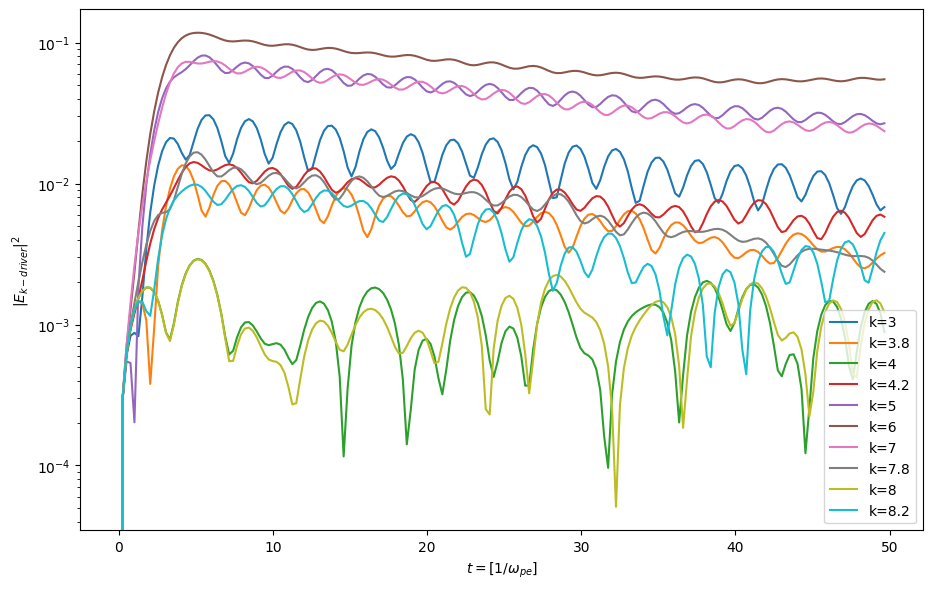

In [77]:
plt.figure(figsize=(18,6))
for i in [3,3.8,4,4.2,5,6,7,7.8,8,8.2]:

    e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d(f'vth_0.055_amp_0.002/k_{i}/MS/FLD/e1/')
    edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d(f'vth_0.055_amp_0.002/k_{i}/MS/DENSITY/electrons/charge/')

    # plt.subplot(1,2,1)
    # plt.imshow(np.abs(np.fft.fft(e1_D_xt,axis=-1)), origin='lower',aspect='auto',interpolation=None)
    # plt.xlim(0,20)
    # plt.xlabel(r'$k c /\omega_{pe}$')
    # plt.ylabel(r'$t \omega_{pe}$')
    # k = 2*np.pi*np.fft.fftfreq(len(x),d = x[1]-x[0])

    plt.subplot(1,2,2)
    plt.semilogy(t,np.abs(np.fft.fft(e1_D_xt,axis=-1))[:,3],label = f'k={i}')
    plt.xlabel(r'$t = [1/\omega_{pe}]$')
    plt.ylabel(r'$|E_{k-driver}|^2$')
    # plt.ylim(1e-2,)
    # plt.semilogy(t,0.08*np.exp(-0.006*t))
    # plt.semilogy(t[100:500],0.12*np.exp(-0.024*t[100:500]))

    plt.tight_layout()

plt.legend()

It looks like something weird is going on for k = 4 and k = 8, my guess is that they are 2x multiples of $\pi$, but then shouldn't we have issues with k = 6 as well? Let's run some sims that are slightly off from 4 and 8 to see if that fixes it.

/tmp/ipykernel_120644/1852645276.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Spectral')


0.014212756141906153


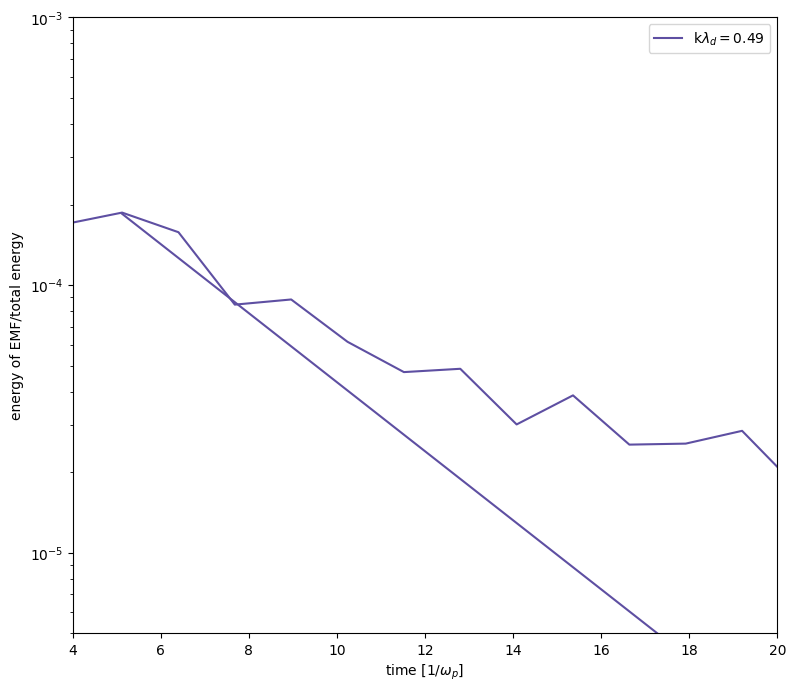

In [71]:
# p1x1_files = np.sort(os.listdir(f'vth_0.055_amp_0.002/'))
# p1x1_files = [3, 3.8, 5, 6, 7, 7.8, 9]
p1x1_files = [9]

fig1 = plt.figure(figsize = (20,8))

ax1 = plt.subplot(1,2,2)
wi_vals = np.array([-0.00039216,-0.00039216, -0.0075667,-0.02292157,-0.04529412,-0.08813529,-0.11284314]) # Pulled this from z_function_ion_kinetics
wi_vals_upper = np.array([-0.00039216,-0.00039216, -0.0075667,-0.02292157,-0.03529412,-0.08813529,-0.08584314])
wi_vals_lower = np.array([-0.00039216,-0.00039216, -0.0099667,-0.02302157,-0.05129412,-0.09913529,-0.1484314]) 
intercepts = np.array([6e-6,
                       5.7e-6,
                       5.4e-6,
                       5.2e-6,
                       5.5e-6,
                       8.5e-6,
                       1.2e-5])
j = 6

cmap = get_cmap('Spectral')

for i in p1x1_files:

    hist = ene_analysis(f'vth_0.055_amp_0.002/k_{i}/HIST/', osirisv='osiris4')

    # print(hist.keys())
    rgba = cmap(i*0.12)
    tot_ene = hist['Ek']+hist['Eemf']
    ax1.semilogy(hist['time'],hist['Eemf']/tot_ene[30], label = f'k$\lambda_d = ${round(0.055*i,2)}',c = rgba)
    ax1.semilogy(hist['time'][4:40],intercepts[j]*np.exp(hist['time'][4:40]*wi_vals_lower[j]*2)/tot_ene[30],c = rgba)
    # ax1.plot(hist['time'],np.log(hist['Eemf']), label = f'k$\lambda_d = ${round(0.055*i,2)}')
    j+=1

# plt.title('emf energy')
plt.xlabel('time [$1/\omega_p$]')
plt.ylabel('energy of EMF/total energy')
plt.ylim(5e-6,1e-3)
plt.xlim(4,20)
plt.legend()
print(tot_ene[30])

## Make a movie of phase space!

/tmp/ipykernel_120644/1929597340.py:24: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)


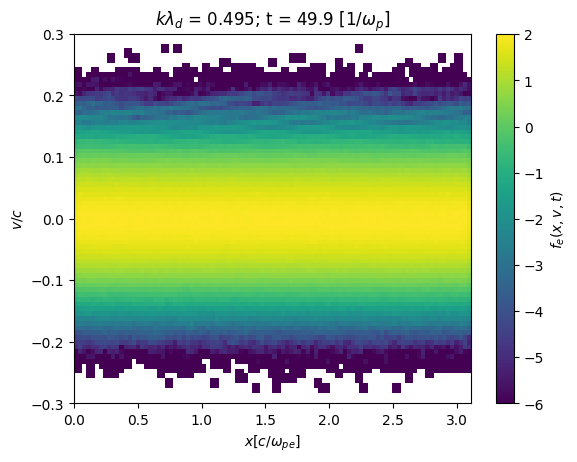

In [84]:
k_val = 9 # Change this value to make more movies
p1x1_files = np.sort(os.listdir(f'vth_0.055_amp_0.002/k_{k_val}/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing

if not (os.path.isdir('figures-phase-space')): # Create a directory for the animation, if there isn't one already
    os.makedirs('figures-phase-space')
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"figures-phase-space/k_{k_val}_pha_space_mov.mp4", dpi=400):
    for i in range(len(p1x1_files)):
        p1x1 = vysxd_get_data(f'vth_0.055_amp_0.002/k_{k_val}/MS/PHA/p1x1/electrons/{p1x1_files[i]}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.title(f'$k\lambda_d$ = {0.055*k_val}; t = {round(p1x1.TIME[0],1)} $[1/\omega_p]$')
        plt.imshow(np.log(-p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -6)
        plt.colorbar(label=r'$f_e(x,v,t)$')
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        plt.ylim(-0.3,0.3)
        writer.grab_frame()

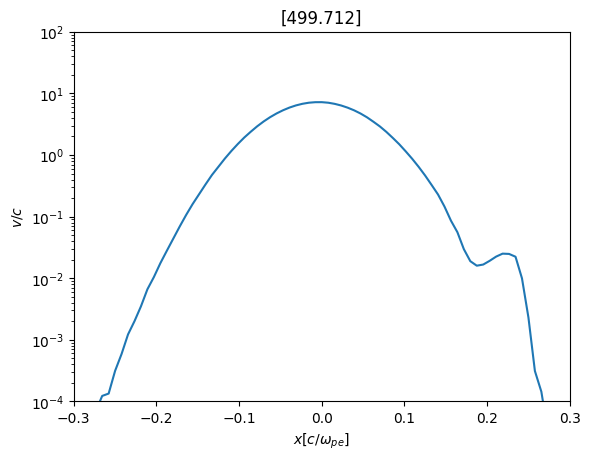

In [85]:
k_val = 6 # Change this value to make more movies
p1x1_files = np.sort(os.listdir(f'vth_0.055_amp_0.002/k_{k_val}/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='distribution-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=24, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()



plt.tight_layout()
# Update the frames for the movie
with writer.saving(fig, f"figs_and_movies/k_{k_val}_dist_movie.mp4", dpi=400):
    for i in range(len(p1x1_files)):
        p1x1 = vysxd_get_data(f'vth_0.055_amp_0.002/k_{k_val}/MS/PHA/p1x1/electrons/{p1x1_files[i]}') # Pull the phase space data
        plt.clf() # This clears the figure so you don't make a million colorbars lol
        plt.semilogy(p1x1.Y, -np.mean(p1x1.DATA,axis=1))
        plt.title(p1x1.TIME)
        plt.xlabel(r'$x [c/\omega_{pe}]$') # Might need to rework this if the axes aren't static
        plt.ylabel(r'$v/c$')
        plt.xlim(-0.3,0.3)
        plt.ylim(1e-4,1e2)
        writer.grab_frame()




dict_keys(['time', 'Ek', 'Eemf', 'par_ene', 'B_ene', 'E_ene', 'B1_ene', 'B2_ene', 'B3_ene', 'E1_ene', 'E2_ene', 'E3_ene', 'ene_conserv'])


Text(0.5, 0, 'time')

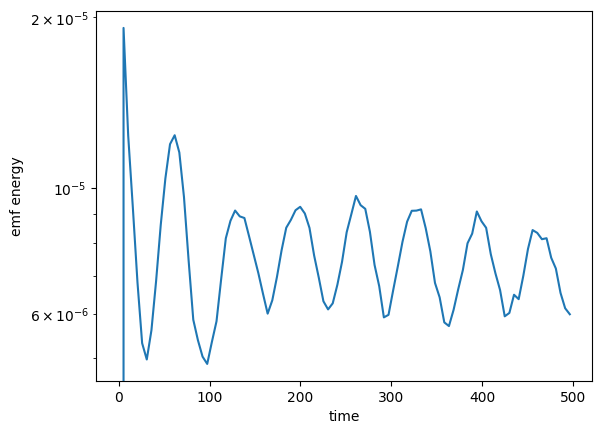

In [88]:
hist = ene_analysis(f'vth_0.055_amp_0.002/k_{k_val}/HIST/', osirisv='osiris4')

print(hist.keys())

# plt.plot(hist['time'],hist['Ek'])
# plt.plot(hist['time'],hist['Eemf']+np.mean(hist['Ek']))
# plt.plot(hist['time'], hist['Eemf']+hist['Ek'])
plt.semilogy(hist['time'],hist['E_ene'])
plt.ylabel('emf energy')
plt.xlabel('time')

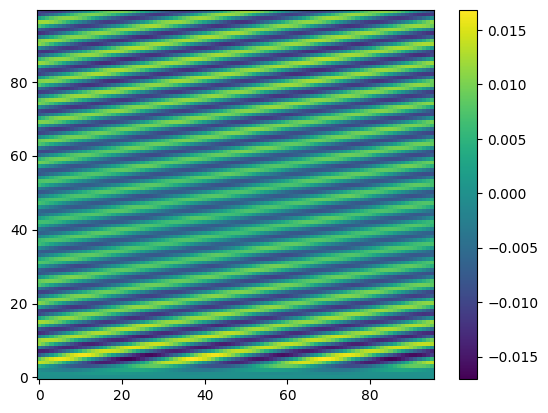

In [17]:
def get_phi_from_rho(rho_tx,x):
    rho_tk = np.fft.fft(rho_tx, axis = -1)
    k = np.fft.fftfreq(len(x),d = x[1]-x[0])
    k[0] = 1
    phi_tk = rho_tk / k**2
    phi_tk[:,0] = 0
    return np.fft.ifft(phi_tk, axis = -1).real


phi_tx = get_phi_from_rho(1+edens_D_xt, x)
plt.imshow(phi_tx, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.imshow(phi_tx, origin='lower', aspect='auto')

plt.colorbar()

Sudden "switch-off" of the driver may be causing jagged oscillations, and wrong phase velocity at later times.

Will try Slow rise followed by slow fall next.

#### Driver envelope: slow linear rise ($2.5~2\pi/\omega_R$) and slow fall ($2.5~2\pi/\omega_R$), with small amplitude (0.001)

In [18]:
e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/FLD/e1/')
edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/DENSITY/electrons/charge/')
idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/DENSITY/ions/charge/')

FileNotFoundError: [Errno 2] No such file or directory: './ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/FLD/e1/'

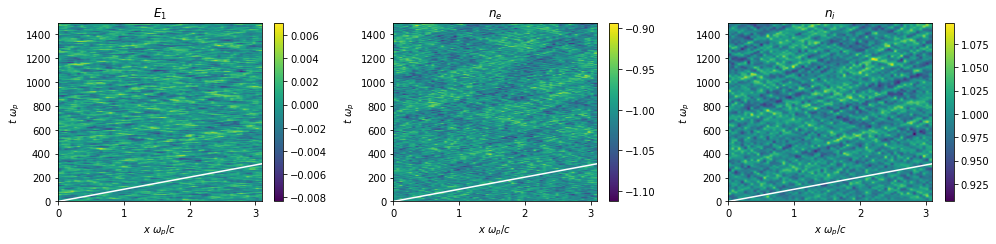

In [ ]:
plt.figure(figsize=(14,3.5))
plt.subplot(1,3,1)
plt.title('$E_1$')
plt.imshow(e1_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
vphi = 0.03933/4
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('$n_e$')
plt.imshow(edens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('$n_i$')
plt.imshow(idens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.tight_layout()

In [ ]:
# subtraction technique:
# loading undriven data
e1_UD_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/no_driver/MS/FLD/e1/')
edens_UD_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/no_driver/MS/DENSITY/electrons/charge/')
idens_UD_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/no_driver/MS/DENSITY/ions/charge/')

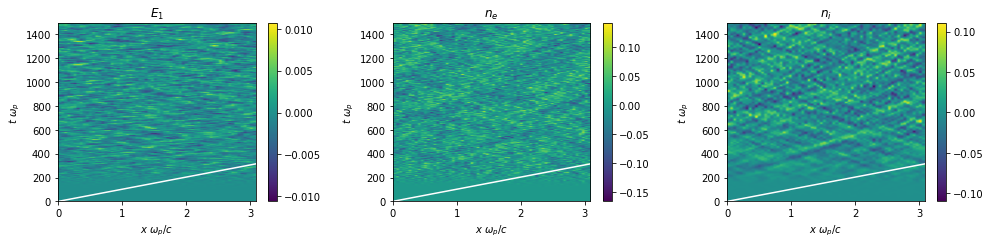

In [ ]:
plt.figure(figsize=(14,3.5))
plt.subplot(1,3,1)
plt.title('$E_1$')
plt.imshow(e1_D_xt-e1_UD_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
vphi = 0.03933/4
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('$n_e$')
plt.imshow(edens_D_xt-edens_UD_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('$n_i$')
plt.imshow(idens_D_xt-idens_UD_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.tight_layout()

In [ ]:
# Attempting higher number of particles per cell

e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld_20000ppc/MS/FLD/e1/')
edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld_20000ppc/MS/DENSITY/electrons/charge/')
idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld_20000ppc/MS/DENSITY/ions/charge/')

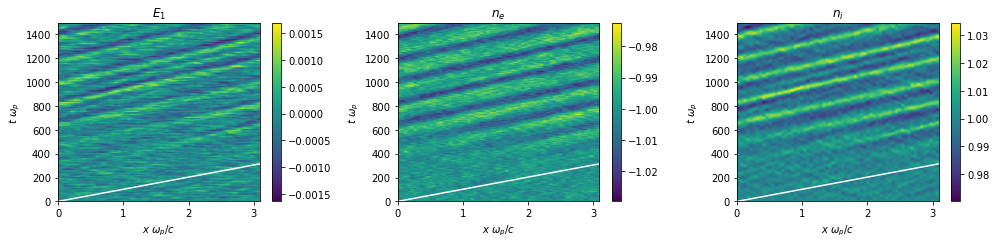

In [ ]:
plt.figure(figsize=(14,3.5))
plt.subplot(1,3,1)
plt.title('$E_1$')
plt.imshow(e1_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
vphi = 0.03933/4
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('$n_e$')
plt.imshow(edens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('$n_i$')
plt.imshow(idens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.tight_layout()

In [ ]:
# subtraction technique:
# loading undriven data
e1_UD_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/no_driver_20000ppc/MS/FLD/e1/')
edens_UD_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/no_driver_20000ppc/MS/DENSITY/electrons/charge/')
idens_UD_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/no_driver_20000ppc/MS/DENSITY/ions/charge/')

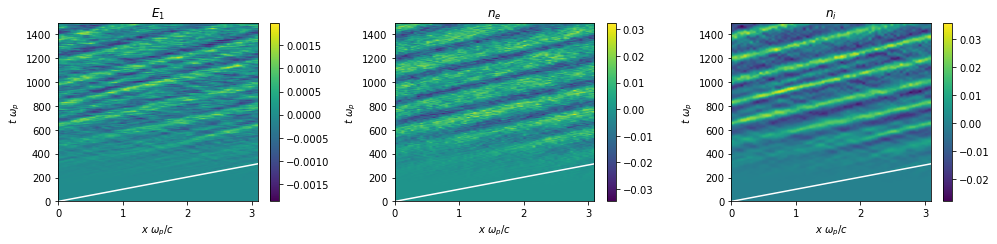

In [ ]:
plt.figure(figsize=(14,3.5))
plt.subplot(1,3,1)
plt.title('$E_1$')
plt.imshow(e1_D_xt-e1_UD_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
vphi = 0.03933/4
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('$n_e$')
plt.imshow(edens_D_xt-edens_UD_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('$n_i$')
plt.imshow(idens_D_xt-idens_UD_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.plot(x,x/vphi, c='w')
plt.xlabel('$x~\omega_p/c$')
plt.ylabel('$t~\omega_p$')
plt.colorbar()

plt.tight_layout()

[1096.964]


<ipython-input-585-3e4900d0cd48>:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -1)


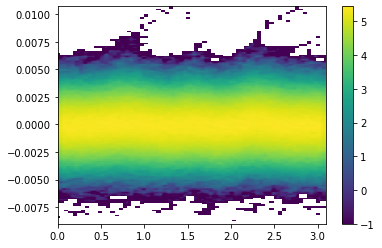

In [ ]:
# p1x1 = vysxd_get_data('./longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld_shorterlowerdriver/MS/PHA/p1x1/ions/p1x1-ions-000050.h5')
p1x1 = vysxd_get_data('./ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld_20000ppc/MS/PHA/p1x1/ions/p1x1-ions-000220.h5')

print(p1x1.TIME)
plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto', vmin = -1)
plt.colorbar()


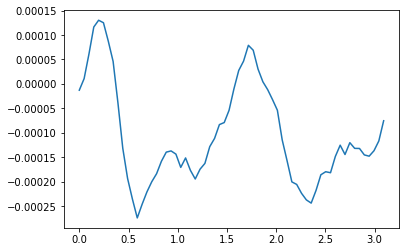

In [ ]:
p1x1 = vysxd_get_data('./ponderomotive/transverse_driver/triangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld_20000ppc/MS/PHA/p1x1/ions/p1x1-ions-000170.h5')
plt.plot(p1x1.X, np.trapz(p1x1.DATA.T*p1x1.Y,p1x1.Y))

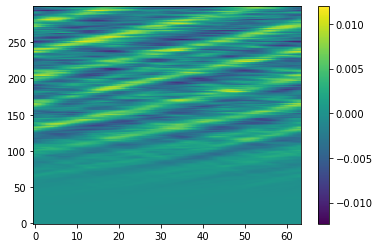

In [ ]:
def get_phi_from_rho(rho_tx,x):
    rho_tk = np.fft.fft(rho_tx, axis = -1)
    k = np.fft.fftfreq(len(x),d = x[1]-x[0])
    k[0] = 1
    phi_tk = rho_tk / k**2
    phi_tk[:,0] = 0
    return np.fft.ifft(phi_tk, axis = -1).real


phi_tx = get_phi_from_rho(idens_D_xt-idens_UD_xt+edens_D_xt-edens_UD_xt, x)
plt.imshow(phi_tx, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.imshow(phi_tx, origin='lower', aspect='auto')

plt.colorbar()

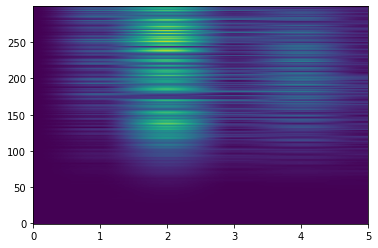

In [ ]:
plt.imshow(np.abs(np.fft.fft(phi_tx,axis=-1)), origin='lower',aspect='auto',interpolation=None)
plt.xlim(0,5)
k = 2*np.pi*np.fft.fftfreq(len(x),d = x[1]-x[0])

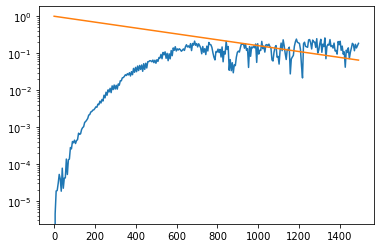

In [ ]:
# plt.semilogy(t,np.abs(np.fft.fft(phi_tx,axis=-1))[:,1])
plt.semilogy(t,np.abs(np.fft.fft(phi_tx,axis=-1))[:,2])
plt.semilogy(t,np.exp(-0.00183215936493391*t))

In [ ]:
# e1_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_ponderomotive_driver/MS/FLD/e1/')

# edens_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_ponderomotive_driver/MS/DENSITY/electrons/charge/')
# idens_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_ponderomotive_driver/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_largerdriver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_largerdriver/MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_largerdriver/MS/DENSITY/ions/charge/')

# e1_ND_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_nodriver/MS/FLD/e1/')
# edens_ND_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_nodriver/MS/DENSITY/electrons/charge/')
# idens_ND_xt, dt, dx, t, x = get_osiris_quantity_1d('./mi-100_theta-30_dx-0.5ld_nodriver/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/standing_wave_k0-0.4lD_mi-100_theta-30_dx-0.5ld_transverse/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/standing_wave_k0-0.4lD_mi-100_theta-30_dx-0.5ld_transverse/MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/standing_wave_k0-0.4lD_mi-100_theta-30_dx-0.5ld_transverse/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld//MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld_shorterdriver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld_shorterdriver/MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld_shorterdriver/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld_shorterlowerdriver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld_shorterlowerdriver/MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld_shorterlowerdriver/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-10_dx-0.5ld_shorterdriver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-10_dx-0.5ld_shorterdriver/MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/longitudinal_driver/k0-0.4lD_mi-100_theta-10_dx-0.5ld_shorterdriver/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/halftraingle_k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/halftraingle_k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./ponderomotive/transverse_driver/halftraingle_k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/DENSITY/ions/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./frank/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./frank/MS/DENSITY/electrons/charge/')
# idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./frank/MS/DENSITY/ions/charge/')

e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./nodriver_mi-100_theta-30_dx-0.5ld/MS/FLD/e1/')
edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./nodriver_mi-100_theta-30_dx-0.5ld/MS/DENSITY/electrons/charge/')
idens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./nodriver_mi-100_theta-30_dx-0.5ld/MS/DENSITY/ions/charge/')

<ipython-input-558-d398f68b2913>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(k, np.sqrt(0.01/(1+1/(k*0.1)**2)),c='w')


(0.0, 1.5)

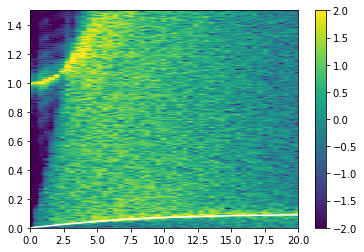

In [ ]:

k = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(x),d = x[1]-x[0]))
w = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(len(t),d = t[1]-t[0]))


plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(e1_D_xt)))), origin='lower',aspect='auto',extent=[k[0],k[-1],w[0],w[-1]],
          vmin=-2,vmax=2)
plt.plot(k, np.sqrt(0.01/(1+1/(k*0.1)**2)),c='w')
plt.colorbar()
plt.xlim(0,20)
plt.ylim(0,1.5)

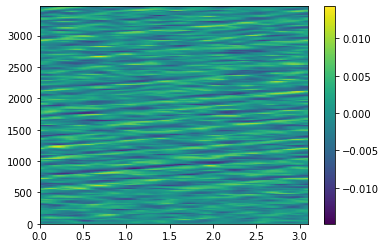

In [ ]:
plt.imshow(e1_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.colorbar()

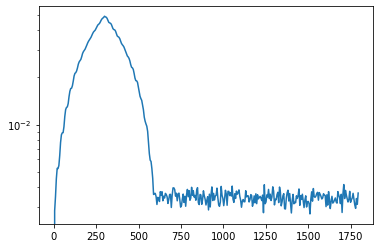

In [ ]:
plt.semilogy(t,np.std(e1_D_xt,axis=1))
# plt.semilogy(t,np.exp(-0.00183215936493391*t))

In [ ]:
L = 3.141592*20
m = 2
wp1 = np.sqrt(1+(2*np.pi*(2+m)/L)**2)
wp2 = np.sqrt(1+(2*np.pi*(m)/L)**2)
wp1-wp2

0.057229081454444275

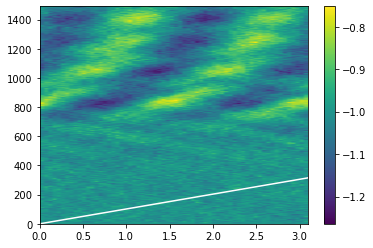

In [ ]:
# plt.imshow(idens_D_xt+edens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.imshow(edens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
vphi = 0.03933/4
plt.plot(x,x/vphi, c='w')
plt.colorbar()

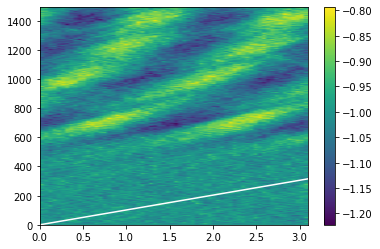

In [ ]:
plt.imshow(edens_D_xt
           , origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
vphi = 0.03933/4
plt.plot(x,x/vphi, c='w')
plt.colorbar()

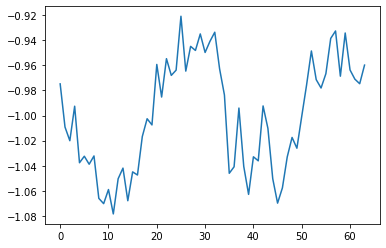

In [ ]:
plt.plot(np.mean(edens_D_xt[100:102,:],axis=0))

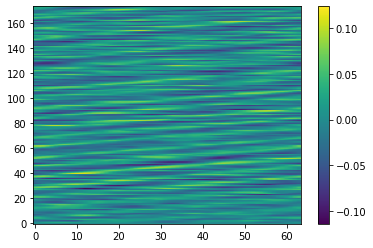

In [ ]:
def get_phi_from_rho(rho_tx,x):
    rho_tk = np.fft.fft(rho_tx, axis = -1)
    k = np.fft.fftfreq(len(x),d = x[1]-x[0])
    k[0] = 1
    phi_tk = rho_tk / k**2
    phi_tk[:,0] = 0
    return np.fft.ifft(phi_tk, axis = -1).real


phi_tx = get_phi_from_rho(idens_D_xt+edens_D_xt, x)
plt.imshow(phi_tx, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.imshow(phi_tx, origin='lower', aspect='auto')

plt.colorbar()

(1e-06, 4.94606452220757)

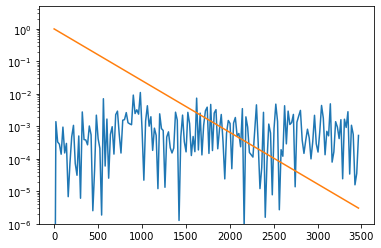

In [ ]:
plt.semilogy(t,phi_tx[:,32]**2)
plt.semilogy(t,np.exp(-2*0.00183215936493391*t))
plt.ylim(1e-6,)

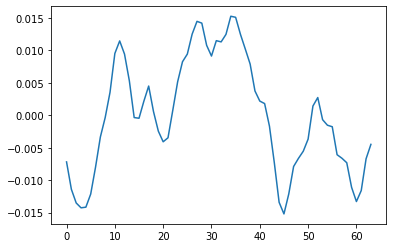

In [ ]:
# plt.plot(phi_tx[50,:])
plt.plot(phi_tx[30,:])

array([  0.        ,   2.        ,   4.        ,   6.00000001,
         8.00000001,  10.00000001,  12.00000001,  14.00000002,
        16.00000002,  18.00000002,  20.00000002,  22.00000003,
        24.00000003,  26.00000003,  28.00000003,  30.00000003,
        32.00000004,  34.00000004,  36.00000004,  38.00000004,
        40.00000005,  42.00000005,  44.00000005,  46.00000005,
        48.00000005,  50.00000006,  52.00000006,  54.00000006,
        56.00000006,  58.00000007,  60.00000007,  62.00000007,
       -64.00000007, -62.00000007, -60.00000007, -58.00000007,
       -56.00000006, -54.00000006, -52.00000006, -50.00000006,
       -48.00000005, -46.00000005, -44.00000005, -42.00000005,
       -40.00000005, -38.00000004, -36.00000004, -34.00000004,
       -32.00000004, -30.00000003, -28.00000003, -26.00000003,
       -24.00000003, -22.00000003, -20.00000002, -18.00000002,
       -16.00000002, -14.00000002, -12.00000001, -10.00000001,
        -8.00000001,  -6.00000001,  -4.        ,  -2.  

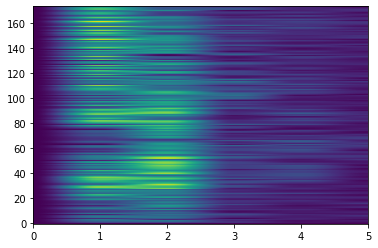

In [ ]:
plt.imshow(np.abs(np.fft.fft(phi_tx,axis=-1)), origin='lower',aspect='auto',interpolation=None)
plt.xlim(0,5)
k = 2*np.pi*np.fft.fftfreq(len(x),d = x[1]-x[0])
k

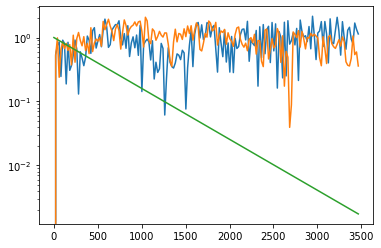

In [ ]:
plt.semilogy(t,np.abs(np.fft.fft(phi_tx,axis=-1))[:,1])
plt.semilogy(t,np.abs(np.fft.fft(phi_tx,axis=-1))[:,2])
plt.semilogy(t,np.exp(-0.00183215936493391*t))

(0.0001, 1.4112713056170205)

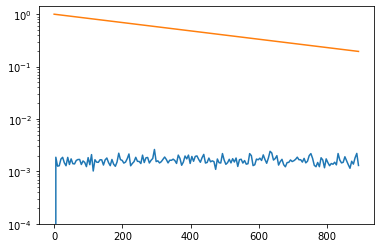

In [ ]:
plt.semilogy(t,np.std(e1_D_xt,axis=1))
plt.semilogy(t,np.exp(-0.00183215936493391*t))
plt.ylim(1e-4,)

In [ ]:
# p1x1 = vysxd_get_data('./longitudinal_driver/k0-0.4lD_mi-100_theta-30_dx-0.5ld_shorterlowerdriver/MS/PHA/p1x1/ions/p1x1-ions-000050.h5')
p1x1 = vysxd_get_data('./')

print(p1x1.TIME)
plt.imshow(np.log(p1x1.DATA), origin='lower', extent=[p1x1.X[0], p1x1.X[-1],p1x1.Y[0],p1x1.Y[-1]], aspect='auto')



OSError: Unable to open file (unable to open file: name = './ponderomotive/transverse_driver/halftriangle_k0-0.4lD_mi-100_theta-30_dx-0.5ld/MS/PHA/p1x1/ions/p1x1-ions-190.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

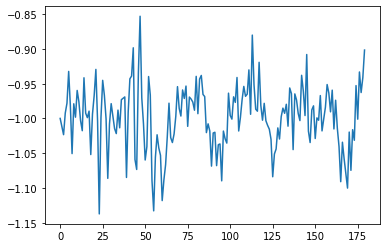

In [ ]:
# plt.plot(idens_D_xt[-1,:]-idens_ND_xt[-1,:])
plt.plot(edens_D_xt[:,16])
# plt.plot(edens_D_xt[-1,:]-edens_ND_xt[-1,:])

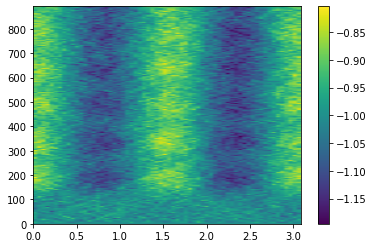

In [ ]:
plt.imshow(edens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')
plt.colorbar()

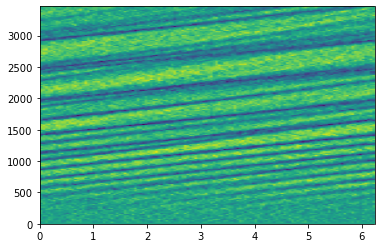

In [ ]:
plt.imshow(edens_D_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')

In [ ]:
plt.imshow(e1_xt, origin='lower', extent=[x[0], x[-1], t[0], t[-1]], aspect='auto')

NameError: name 'e1_xt' is not defined

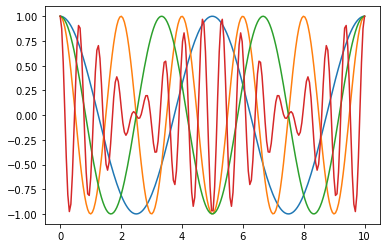

In [ ]:
L  = 10
y = np.linspace(0,L,200)
plt.plot(y,np.cos(2*np.pi/(L/2)*y))
plt.plot(y,np.cos(2*np.pi*(2+3)/L*y))
plt.plot(y,np.cos(2*np.pi*(3)/L*y))
plt.plot(y,(np.cos(2*np.pi*(2+15)/L*y)+np.cos(2*np.pi*(15)/L*y))/2)


In [ ]:
np.pi

3.141592653589793

In [ ]:
sin(2*3.141592653589793/L * (1+10) * x1 - 2*3.141592653589793/L * (1+10) * t)